In [1]:
%load_ext autoreload
%autoreload 2
import torch
from matplotlib import pyplot as plt
import matplotlib as mpl
import seaborn as sns
import numpy as np
from time import time
from tqdm import tqdm
from collections import defaultdict
from math import ceil
import seaborn as sns
from approxmh.utilities import *
from approxmh.vae import VAE, VAETrainer, get_filename
from approxmh.samplers import *
from approxmh.distributions import Banana, Funnel, create_gaussian_lattice, create_random_gaussian_mixture, get_mode_coverage
from approxmh.distribution_metrics import *
from approxmh.rnvp import RNVP
from approxmh.flow_trainer import FlowTrainer

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('device:', device)

2024-08-13 13:00:05.961919: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-13 13:00:05.972253: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-13 13:00:05.975503: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-08-13 13:00:06.981740: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


device: cpu


In [3]:
target = Funnel(dim=128, device=device, a=3)

In [6]:
hidden_dims = (128, 128, 128)
model = VAE(
    data_dim=target.dim,
    hidden_dims=hidden_dims,
    latent_dim=target.dim,
    device=device
)
model_filename = f'models/{target}_hdim{hidden_dims}_vae'

In [7]:
N = 5000

In [8]:
%%timeit

model_samples = model.sample((N,))

19.7 ms ± 1.4 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [12]:
model_samples = model.sample((N,))
estimator = lambda x: model.iw_log_marginal_estimate(x, return_variance=False)

In [15]:
%%timeit

acc_rate, mh_samples = metropolis_hastings_filter(target, model_samples, estimator, n_estimates=1)

KeyboardInterrupt: 

MH discarded 22 outlier(s)


(1e-20, 10000000000.0)

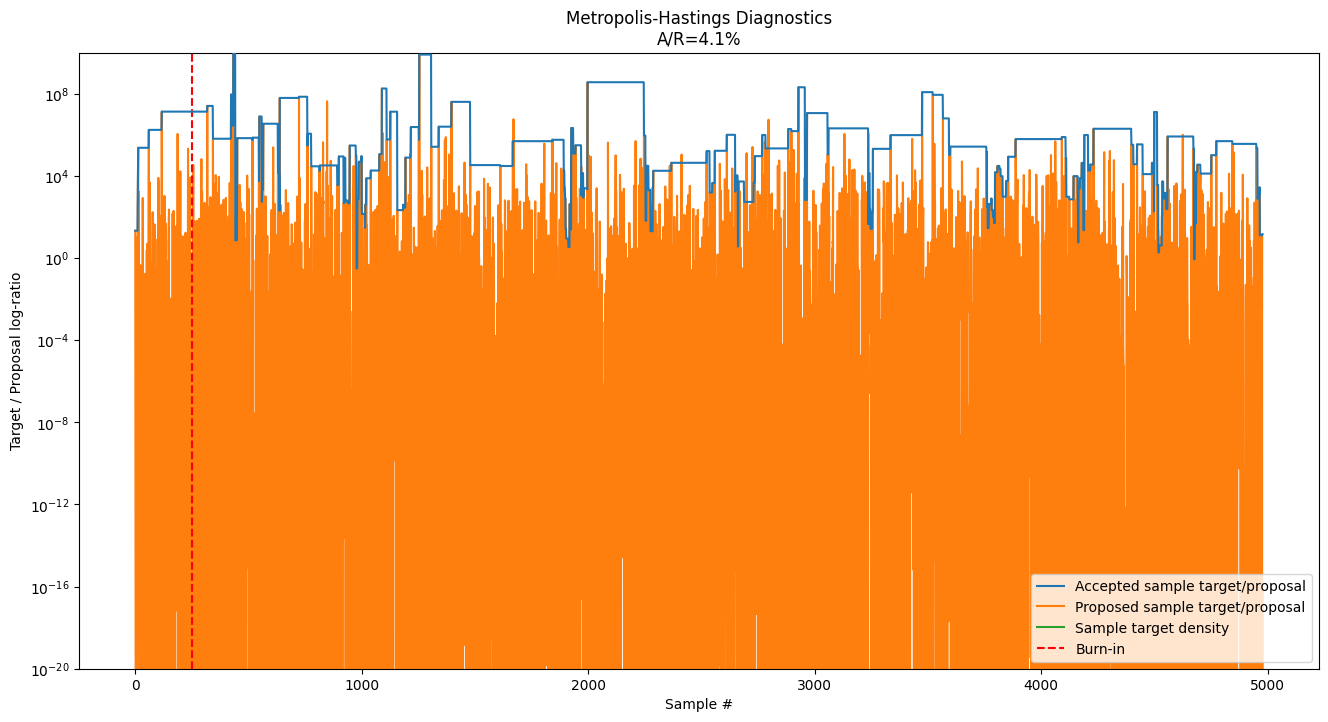

In [14]:
acc_rate, mh_samples = metropolis_hastings_filter(target, model_samples, estimator, n_estimates=2, visualize=True, max_density_ratio=15)
plt.gca().set_ylim(1e-20, 1e10)